In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading the data
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df.shape

(20640, 10)

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Dropping the null values since there is enough data to evaluate

In [11]:
df= df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Exploratory Data Analysis

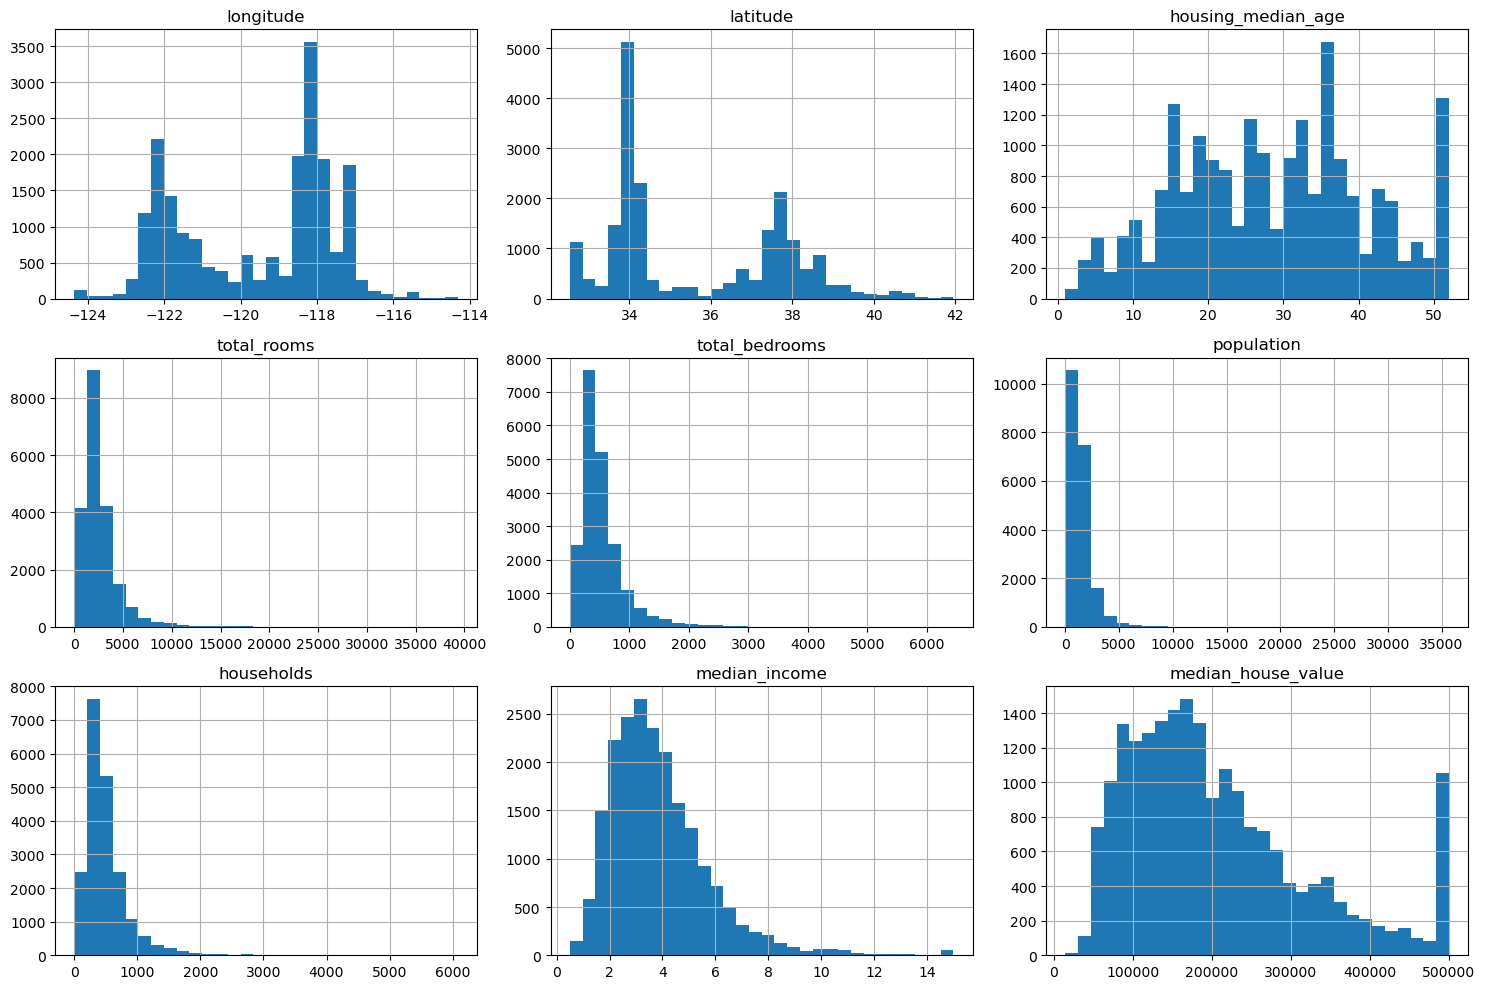

In [18]:
numerical_columns = df.select_dtypes(include = 'float64')
#creating histogram for all numerical columns
numerical_columns.hist(bins = 30,figsize = (15,10))
plt.tight_layout()
plt.show()

In [43]:
#Explore the column ocear_proximity
count = df['ocean_proximity'].value_counts()
count

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [21]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [23]:
df['ocean_proximity'].value_counts(normalize= True)*100

<1H OCEAN     44.212793
INLAND        31.791709
NEAR OCEAN    12.861547
NEAR BAY      11.109480
ISLAND         0.024470
Name: ocean_proximity, dtype: float64

In [78]:
ocean_values = df['ocean_proximity'].value_counts(normalize =True)*100

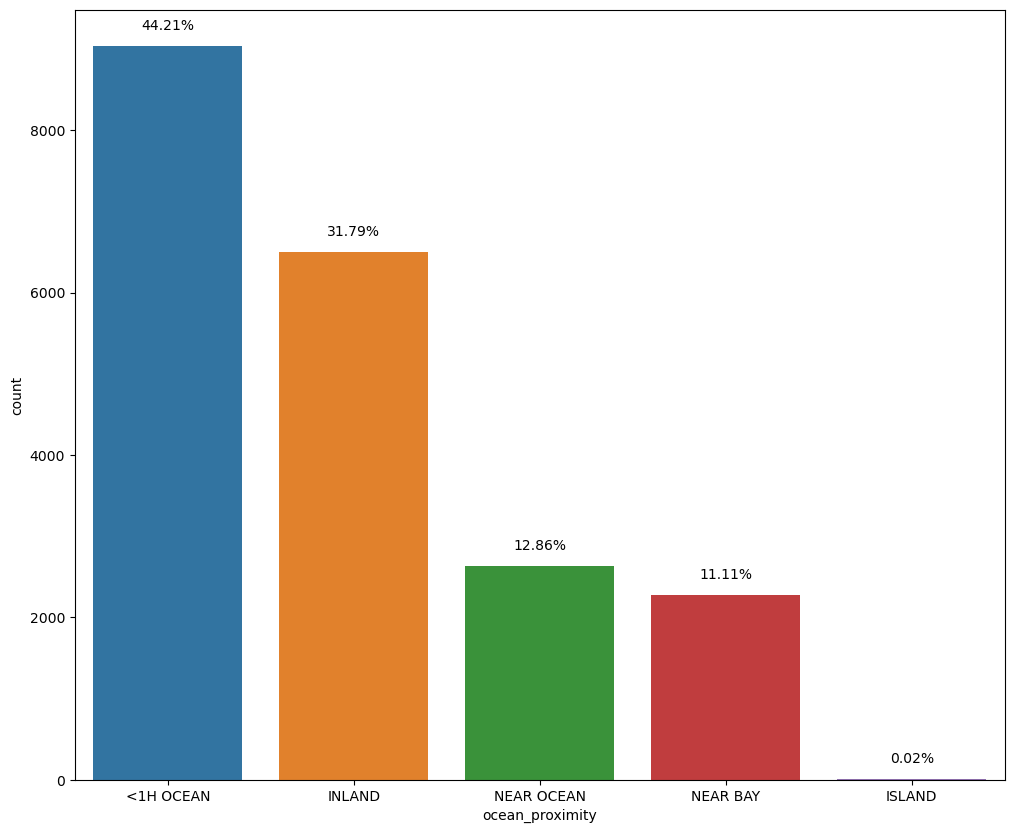

In [79]:
plt.figure(figsize = (12,10))
sns.countplot(x = "ocean_proximity",data = df,order = ['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'])
for i in range(5):
    y = count[i]
    text = ocean_values[i]
    plt.text(i,count[i]+200,f'{text:.2f}%',ha = 'center')

<Axes: xlabel='median_income', ylabel='median_house_value'>

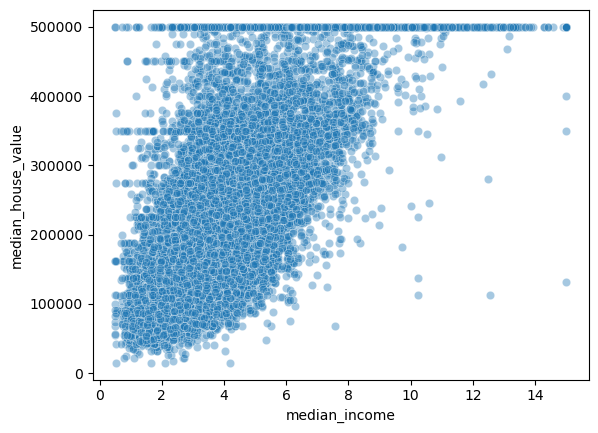

In [84]:
### checking the scatter plot between median_income and median_house_value
sns.scatterplot(data = df,x = 'median_income',y = 'median_house_value',alpha = 0.4)

In [86]:
## Keeping median income in bins
income_bins = pd.cut(df['median_income'],bins = [0,1.5,3,4.5,6,np.inf],labels=["0 - 1.5","1.5 - 3","3 - 4.5","4.5 - 6"," > 6 "])


<Axes: xlabel='median_income', ylabel='count'>

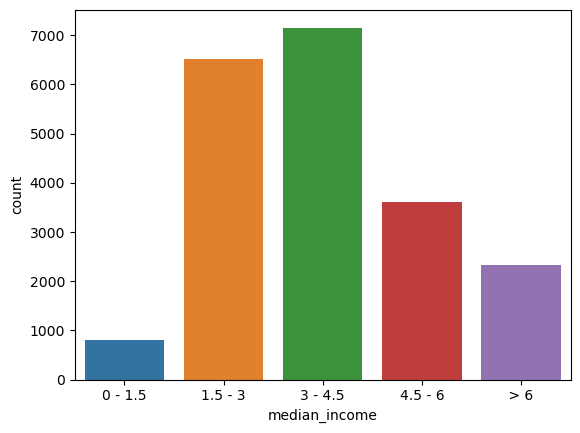

In [90]:
sns.countplot(x = income_bins)

## Majority of the median_income is between 3-4.5

In [95]:
df.median_house_value.describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [96]:
housing_prices = pd.cut(df['median_house_value'],bins =[-np.inf,100000,200000,300000,400000,500000,np.inf],labels= ["inf-100k","100k-200k",'200k-300k','300k-400k','400k-500k','500k-inf'])

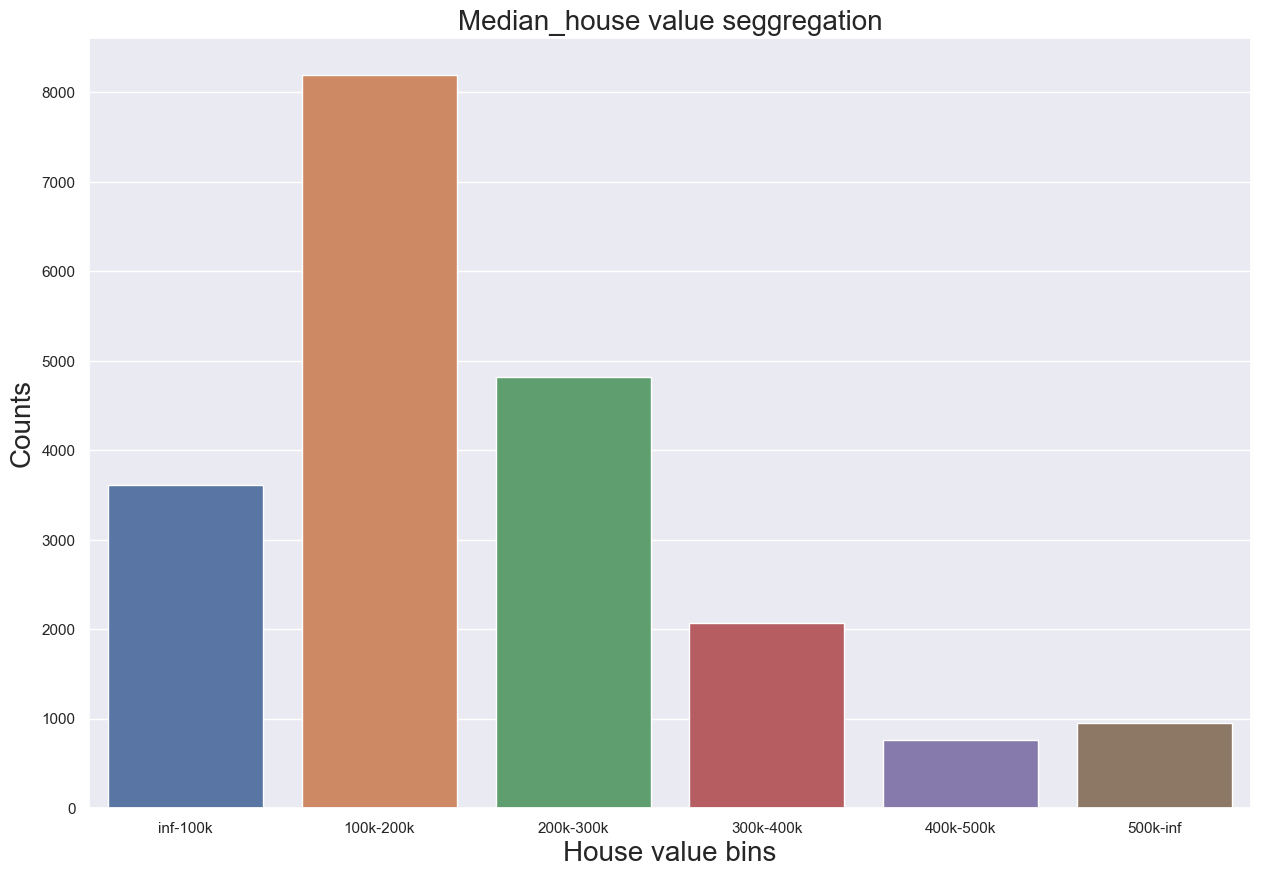

In [113]:
plt.figure(figsize =(15,10))
sns.set()
sns.countplot(x =housing_prices)
plt.title("Median_house value seggregation",fontdict={'fontsize': 20})
plt.xlabel("House value bins",fontdict={'fontsize': 20})
plt.ylabel("Counts",fontdict={'fontsize': 20})
plt.show()

### Majority of the houses are between 100k and 200k

### Bivariate Analysis

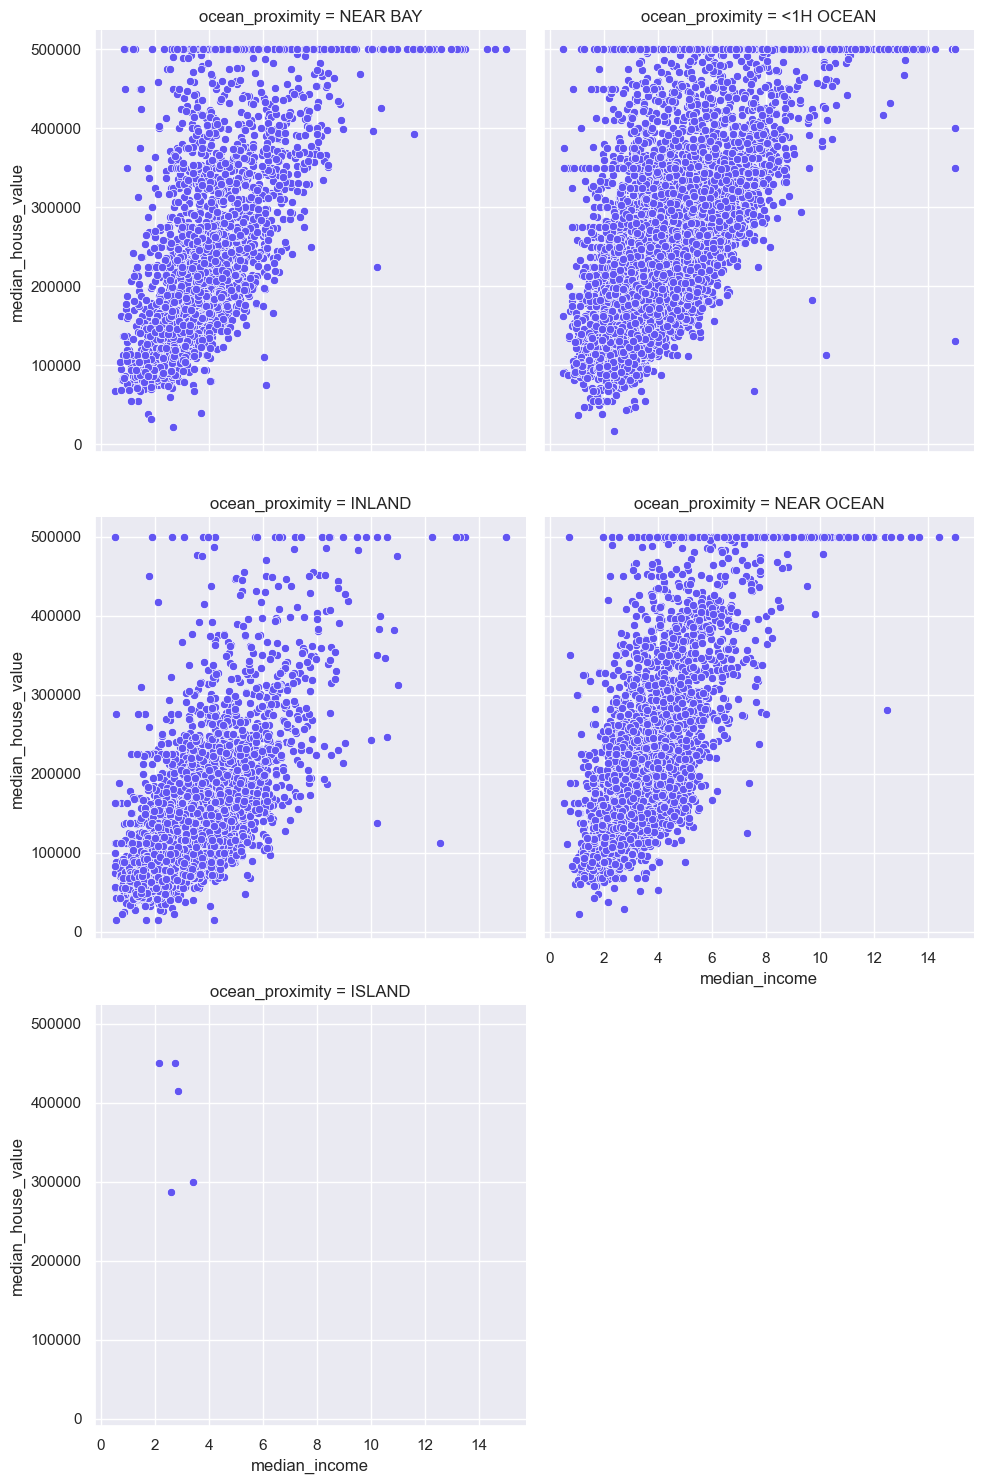

In [119]:
## Scatterplot between median_income and median_house_value at each ocean_proximity
sns.relplot(data = df,x = "median_income",y = 'median_house_value',col = 'ocean_proximity',col_wrap=2,color ='#6255f2')

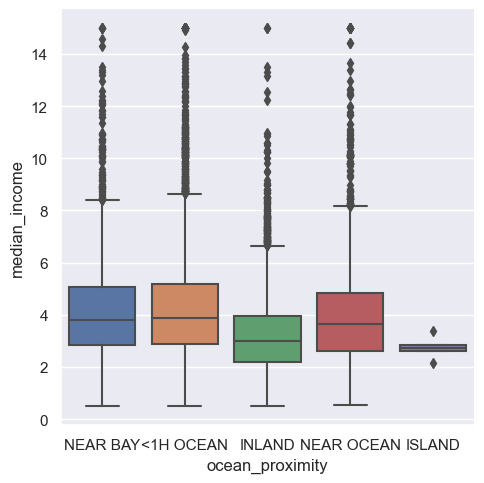

In [124]:
## Box plots between ocean_proximity and median income
sns.catplot(data = df,x ="ocean_proximity",y = 'median_income',kind ='box')

## observation
- It seems that median income with respect to ISLAND is very less comparitively.
- For all the other categories of the ocean_proximity median_income is equally distributed

In [129]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

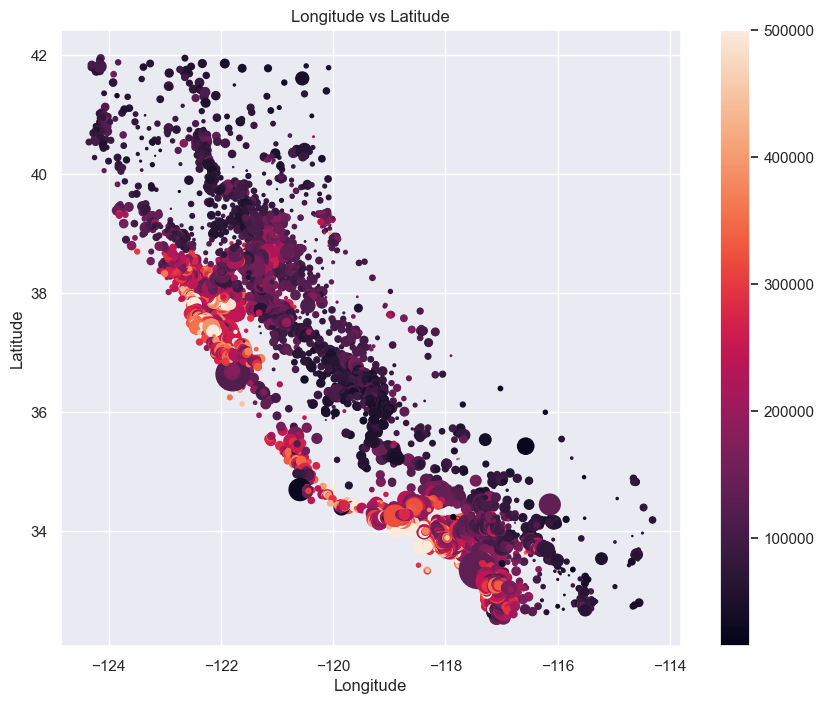

In [140]:
# Scatter plot between longitude and latitude
plt.figure(figsize = (10,8))
plt.scatter(x = df["longitude"],y = df['latitude'],c =df['median_house_value'],s = df['population']/50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude vs Latitude")
plt.colorbar()
plt.show()


### Checking the correlation between each variables

In [141]:
df.corr()

C:\Users\Prince\AppData\Local\Temp\ipykernel_1120\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


C:\Users\Prince\AppData\Local\Temp\ipykernel_1120\832949946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


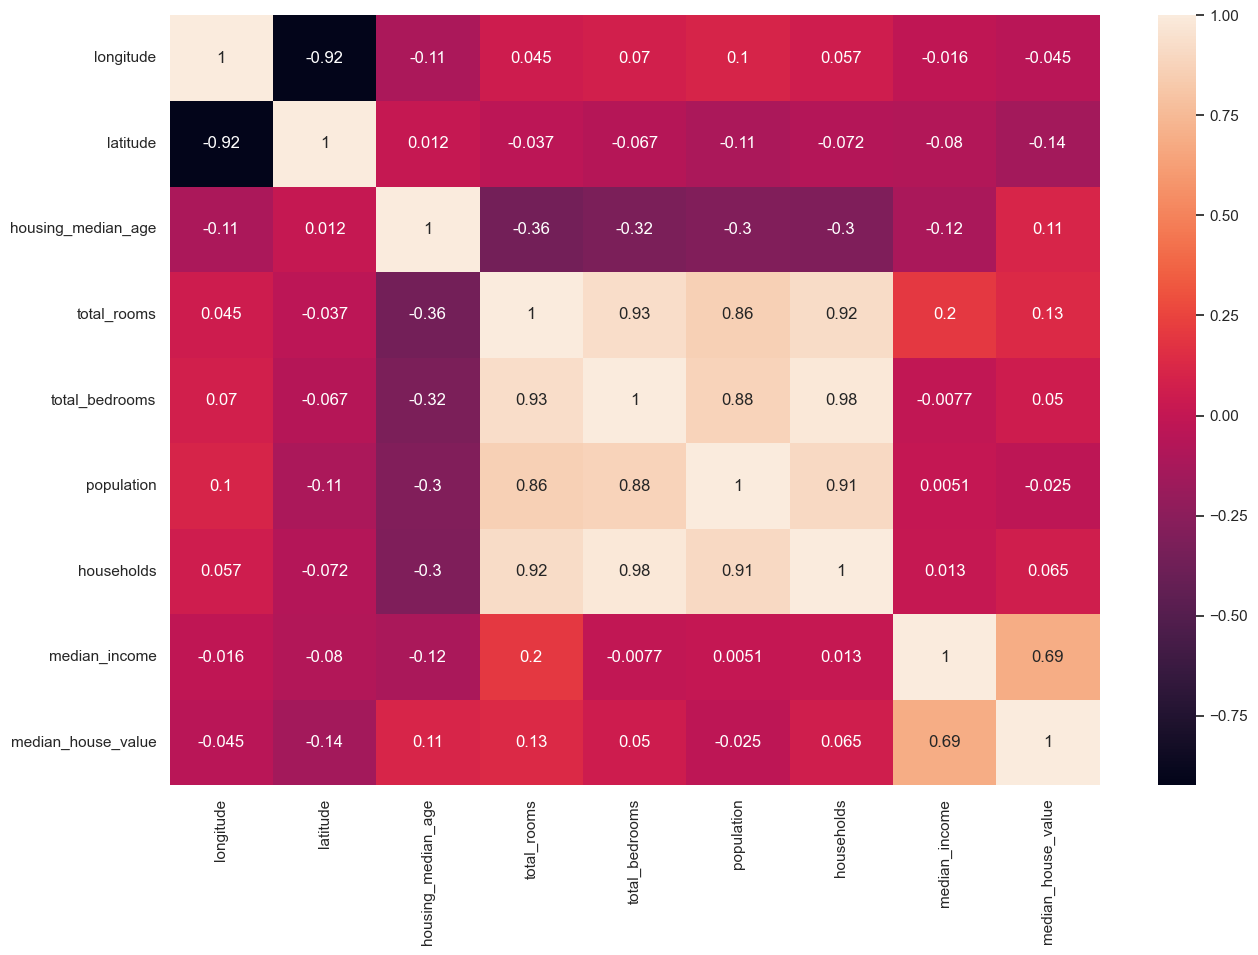

In [144]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Observation
- Obviously as population increases total_rooms,total_bedrooms,households increases
- We can see a positive realtionship between median_house_value and median_income